# Problem Statement

__Leslie Salt Data Set__

In 1968, the city of Mountain View, California, began the necessary legal proceedings to acquire a parcel of land owned by the Leslie Sal Company. The Leslie property contained 246.8 acres and was located right on the San Francisco Bay. The land had been used for salt evaporation and had an elevation of exactly sea level. However, the property was diked so that the waters from the bay park were kept out. The city of Mountain View intended to fill the property and use it for a city park. 
Ultimately, it fell into the courts to determine a fair market value for the property. Appraisers were hired, but what made the processes difficult was that there were few sales of byland property and none of them corresponded exactly to the characteristics of the Leslie property. The experts involved decided to build a regression model to better understand the factors that might influence market valuation. They collected data on 31 byland properties that were sold during the previous 10 years. In addition to the transaction price for each property, they collected data oina large number of other factors, including size, time of sale, elevation, location, and access to sewers. A listing of these data, including only those variables deemed relevant for this exercise. A description of the variables is provided below



Price- 	Sales price in $000 per acre 

County- 	San Mateo=0, Santa Clara =1 

Size  -Size of the property in acres 

Elevation- 	Average Elevation in foot above sea level 

Sewer -	Distance (in feet) to nearest sewer connection 

Date - 	Date of sale counting backward from current time (in months) 

Flood -	Subject to flooding by tidal action =1; otherwise =0 

Distance -	Distance in miles from Leslie Property (in almost all cases, this is toward San Francisco 


Discuss and Answer the following questions: 

1. What is the nature of each of the variables? Which variable is dependent variable and what are the independent variables in the model? 

2. Check whether the variables require any transformation individually 

3. Set up a regression equation, run the model and discuss your results 


In [3]:
library(xlsx)
data <- read.xlsx("Data/Dataset_LeslieSalt.xlsx",1)
attach(data)
str(data)


Warning message:
"package 'xlsx' was built under R version 3.6.3"

'data.frame':	31 obs. of  8 variables:
 $ Price    : num  4.5 10.6 1.7 5 5 3.3 5.7 6.2 19.4 3.2 ...
 $ County   : num  1 1 0 0 0 1 1 1 1 1 ...
 $ Size     : num  138.4 52 16.1 1695.2 845 ...
 $ Elevation: num  10 4 0 1 1 2 4 4 20 0 ...
 $ Sewer    : num  3000 0 2640 3500 1000 10000 0 0 1300 6000 ...
 $ Date     : num  -103 -103 -98 -93 -92 -86 -68 -64 -63 -62 ...
 $ Flood    : num  0 0 1 0 1 0 0 0 0 0 ...
 $ Distance : num  0.3 2.5 10.3 14 14 0 0 0 1.2 0 ...


## Feature Engineering

In [4]:
data$County <- factor(data$County,  levels=c("0","1"), labels=c("San Mateo", "Santa Clara" ))
data$Flood <- factor(data$Flood,  levels=c("0","1"), labels=c("No", "Yes" ))
summary(data)


     Price               County        Size           Elevation     
 Min.   : 1.70   San Mateo  :12   Min.   :   6.90   Min.   : 0.000  
 1st Qu.: 5.35   Santa Clara:19   1st Qu.:  20.35   1st Qu.: 2.000  
 Median :11.70                    Median :  51.40   Median : 4.000  
 Mean   :11.95                    Mean   : 139.97   Mean   : 4.645  
 3rd Qu.:16.05                    3rd Qu.: 104.10   3rd Qu.: 7.000  
 Max.   :37.20                    Max.   :1695.20   Max.   :20.000  
     Sewer            Date         Flood       Distance     
 Min.   :    0   Min.   :-103.00   No :26   Min.   : 0.000  
 1st Qu.:    0   1st Qu.: -63.50   Yes: 5   1st Qu.: 0.850  
 Median :  900   Median : -59.00            Median : 4.900  
 Mean   : 1981   Mean   : -58.65            Mean   : 5.132  
 3rd Qu.: 3450   3rd Qu.: -51.00            3rd Qu.: 5.500  
 Max.   :10000   Max.   :  -4.00            Max.   :16.500  

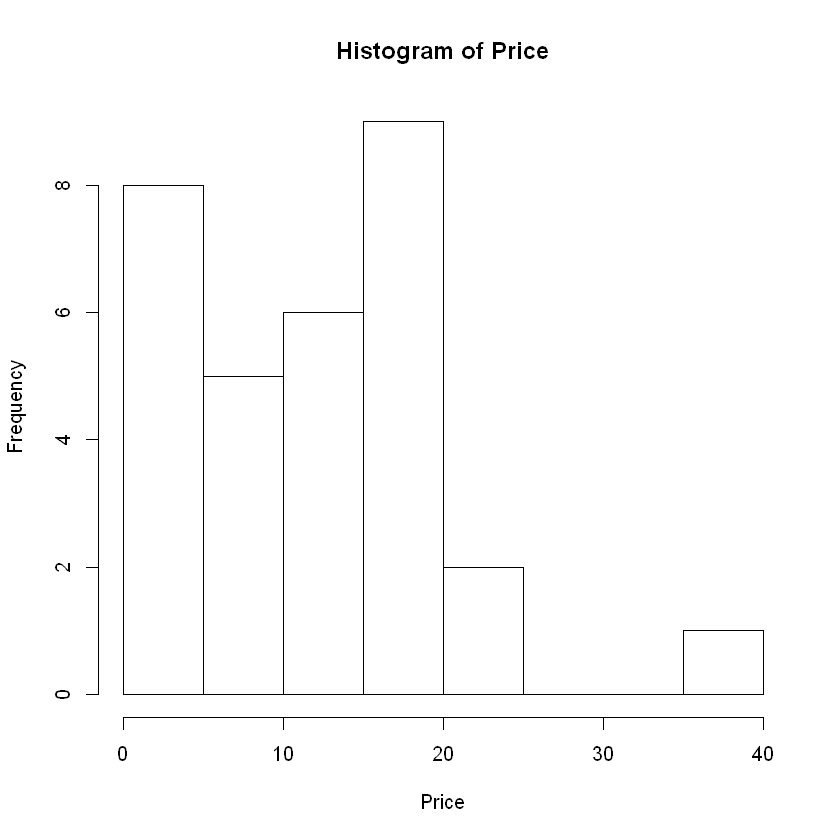

In [5]:
hist(Price)

From the above histogram, Price (dependent variable) is right skewed. Such skewness is problematic, violates the assumptions of regression model.

To reduce skewness, transform the dependent variable to log form


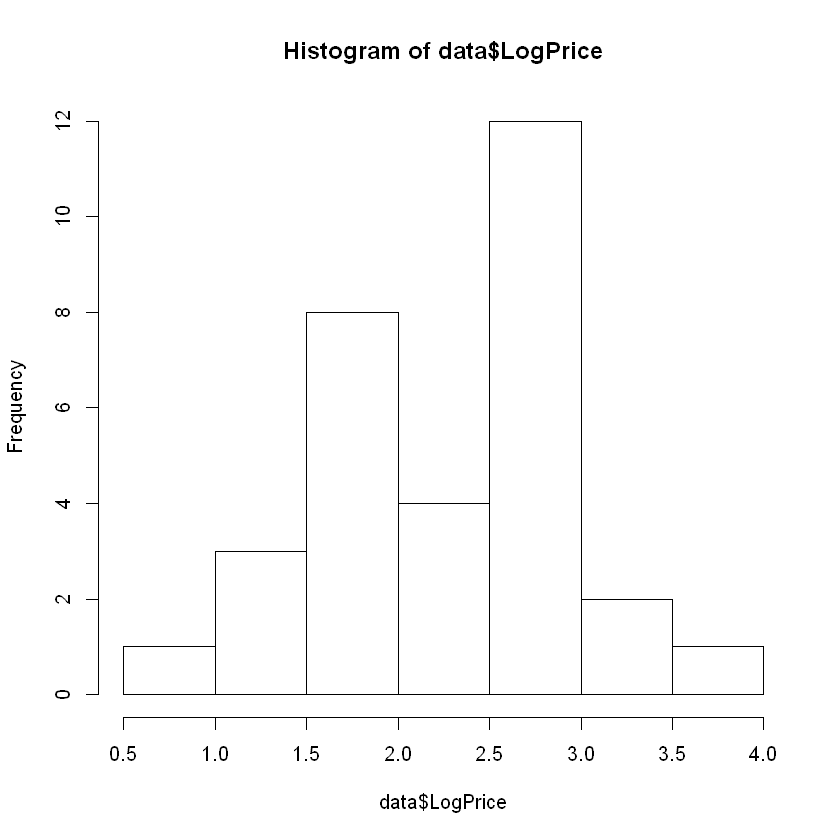

In [6]:
data$LogPrice=log(Price)
hist(data$LogPrice)


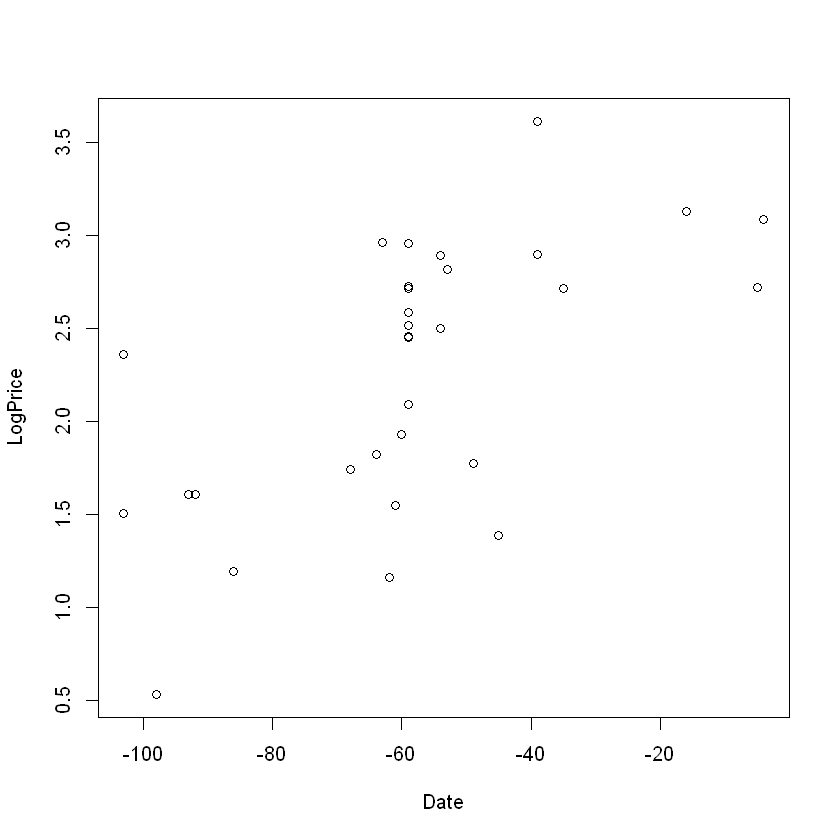

In [8]:
plot(LogPrice~Date,data=data)

Above diagram shows that, price increases as time increases. Properties which are bought recently, bought with high price. Price increases overtime. Hence Date having significant impact on price.

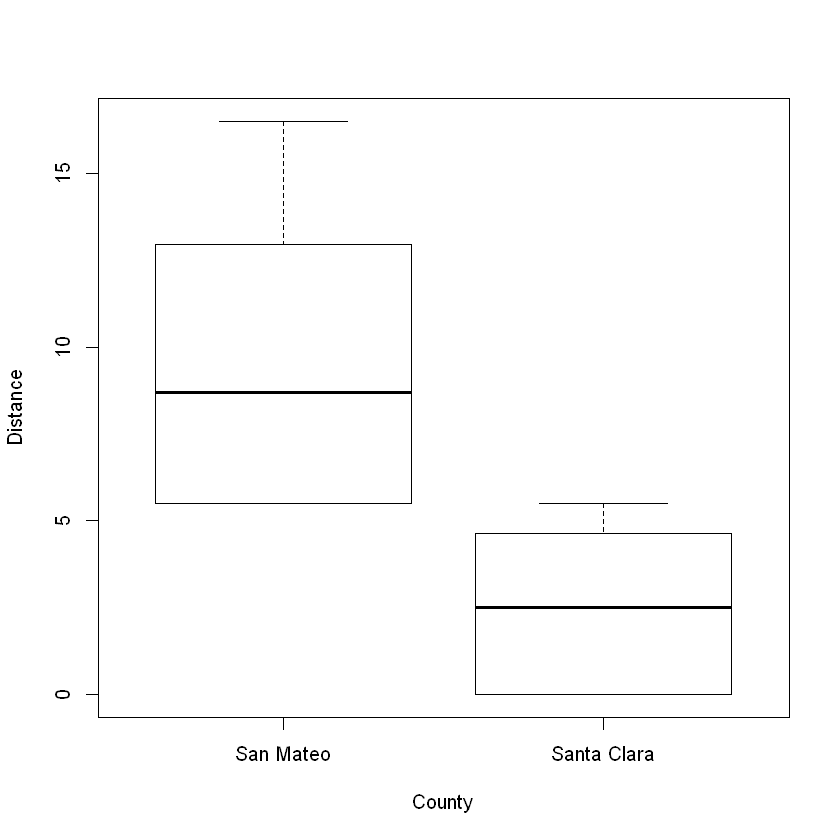

In [9]:
plot(Distance~County,data=data)

Above box plot shows shat Leslie property is very near to County ‘Santa Clara’.

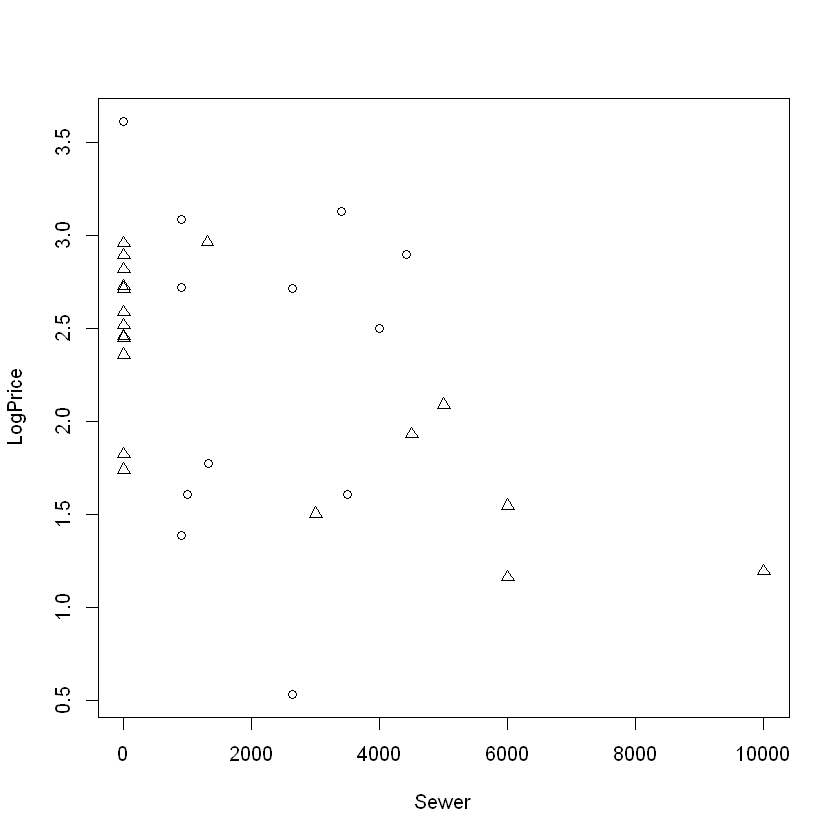

In [10]:
plot(LogPrice~Sewer,data=data,pch=(1:2)[County])

From above scatter diagram, distance to Sewer connection doesn’t have much importance.  Property for which is having sewer connection 4000 feet distance, is also priced equivalent to property with sewer connection less than 500 feet distance. However.  if sewer connection is more than 5000 feet distance, though they property resides in highly elevated area (no flooding) , it is priced low. We may include this variable or not depends on how much it improves the model.

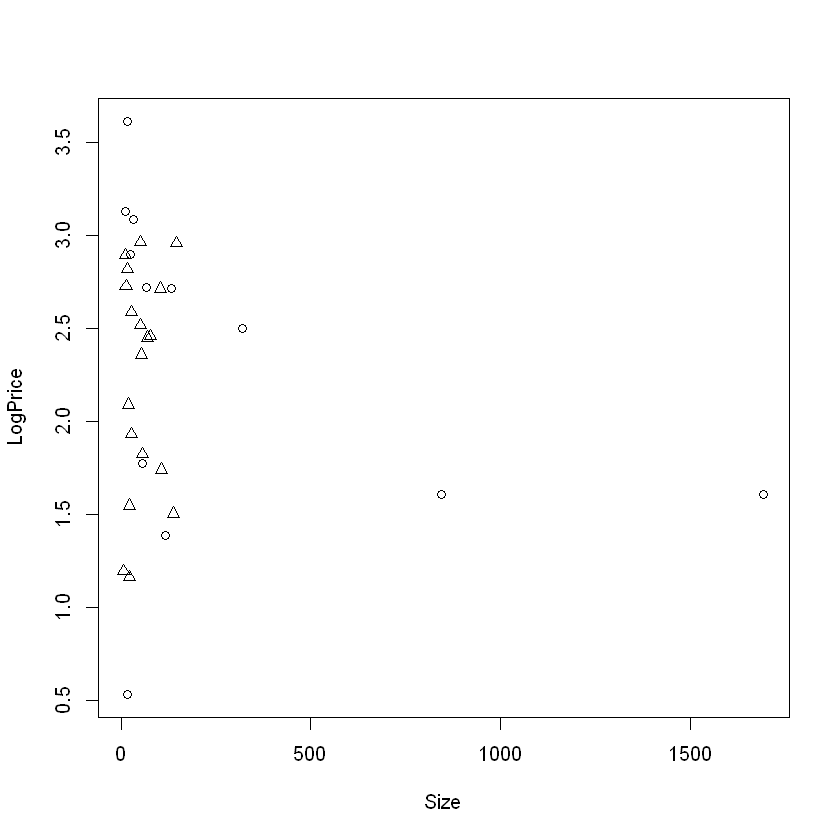

In [12]:
plot(LogPrice~Size,data=data,pch=(1:2)[County])

From the above scatter diagram, size doesn’t have much importance on pricing.  All most 90% of properties are is same size. So, including size in our regression model will not give significant improvement in the model.

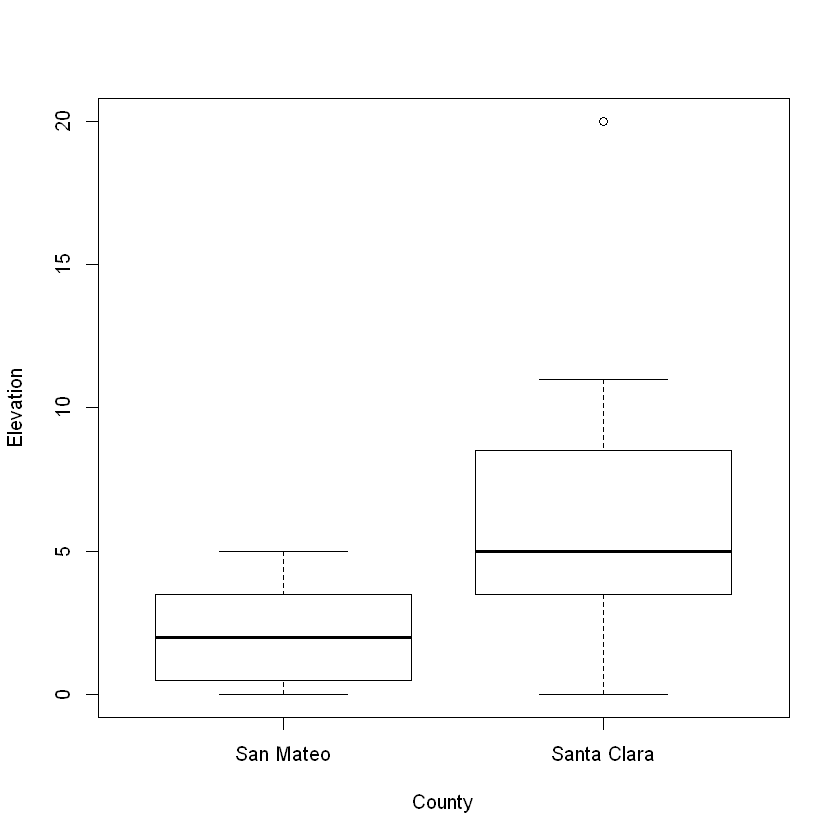

In [13]:
plot(Elevation~County,data=data)

Above diagram depicts that, ‘Santa Clara’ county is highly elevated compare to ‘San Mateo’. Leslie property is near to Santa Clara.

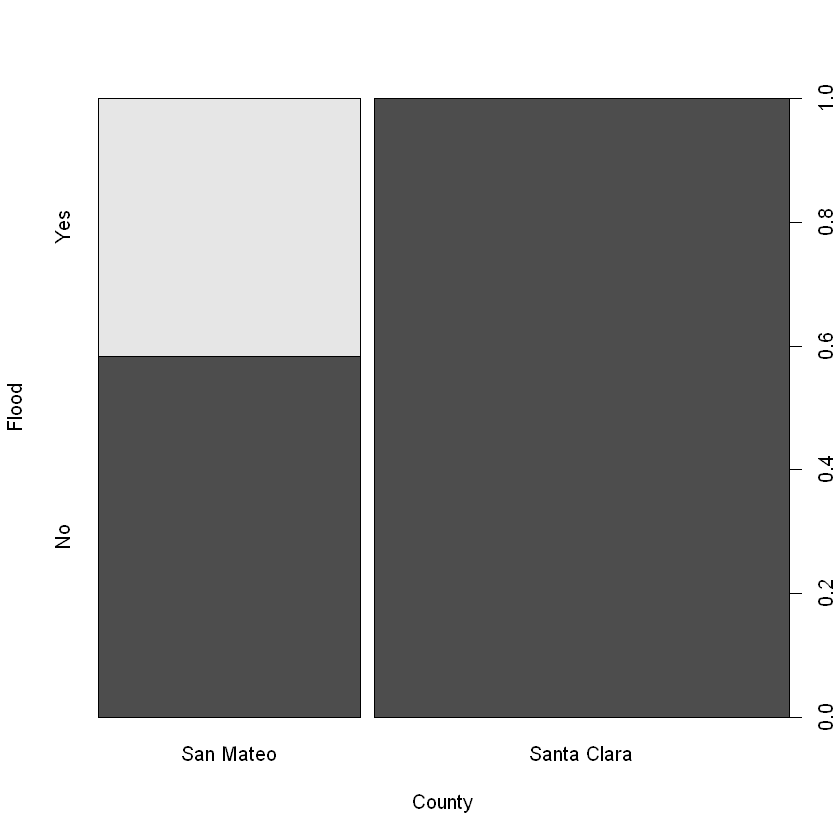

In [14]:
plot(Flood~County,data=data)

Elevation of Santa Clara is high, so property in ‘Santa-Clara’ is not subject to flooding compare to ‘San Mateo’.

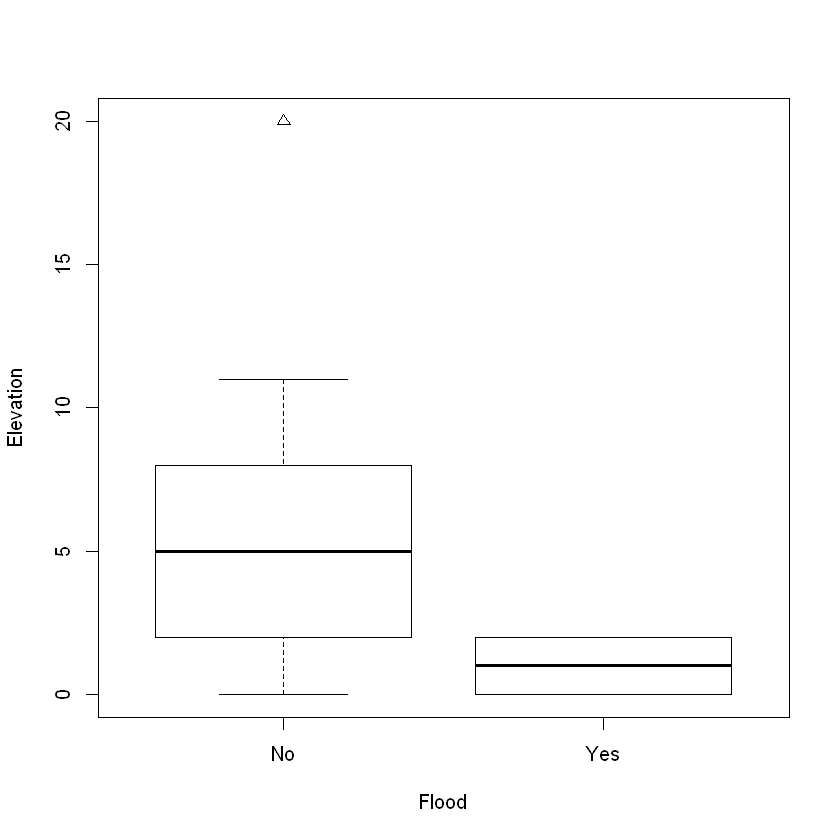

In [15]:
plot(Elevation~Flood,data=data,pch=(1:2)[County])

Highly elevated property is not subject to flooding.

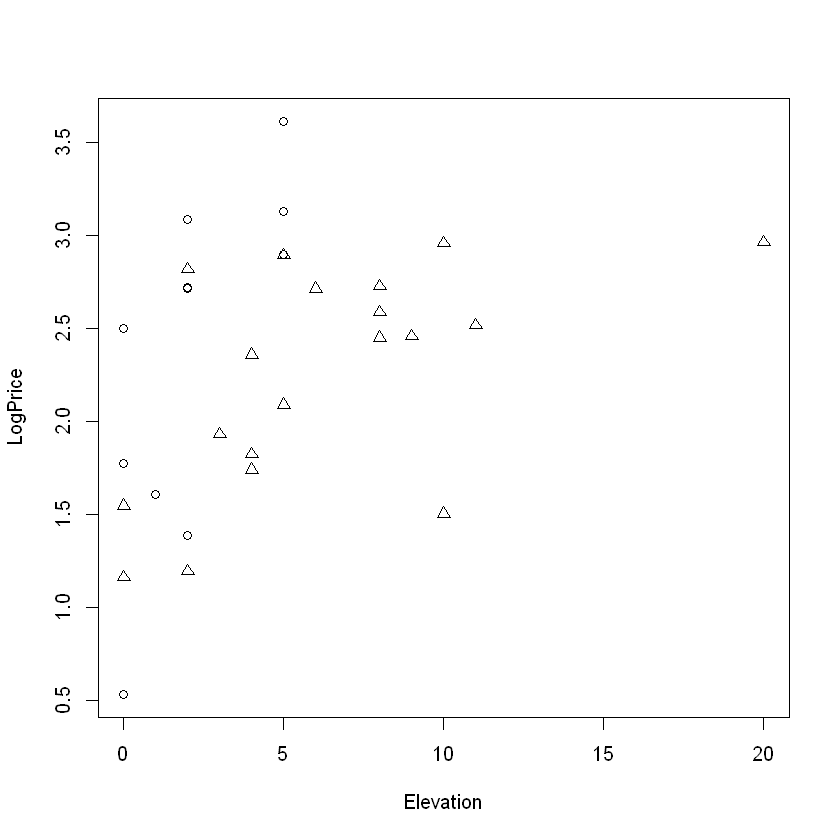

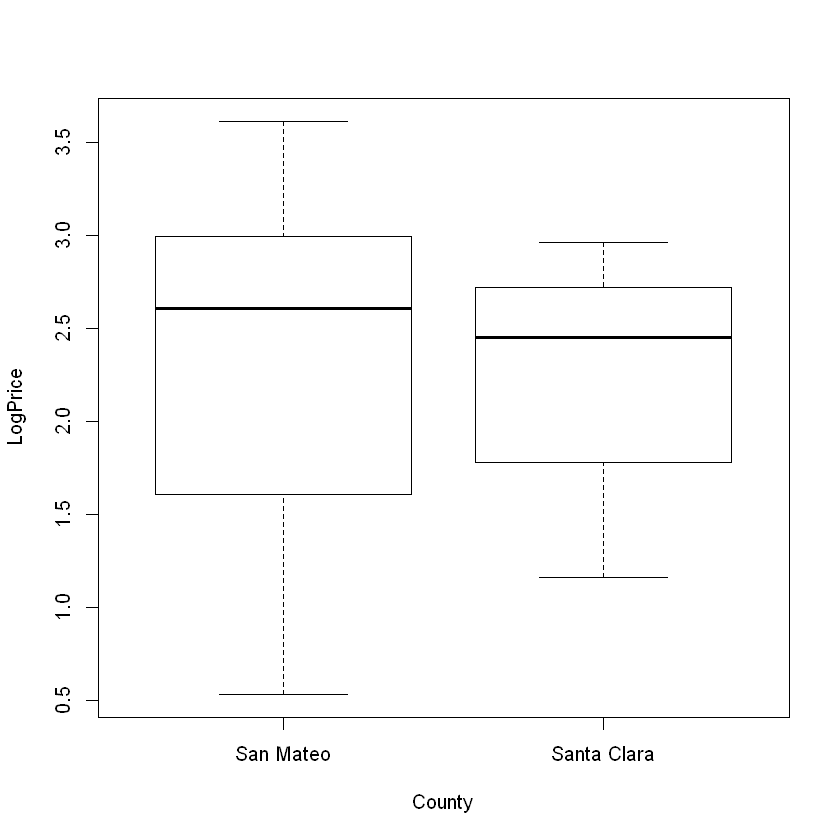

In [16]:
plot(LogPrice~Elevation+County,data=data,pch=(1:2)[County])

Above diagram shows that there is greater percentage of increase in price for each additional foot of elevation. However, slope varies based on county. There is ‘x’ percentage increase in the for 1 feet increase in elevation level if the property in ‘Santa Clara’. However, ‘y’ percentage increase in the for 1 feet increase in elevation level if the property in ‘San Mateo’  
Variation in price is not only effect on elevation alone. It is combination of elevation and county.


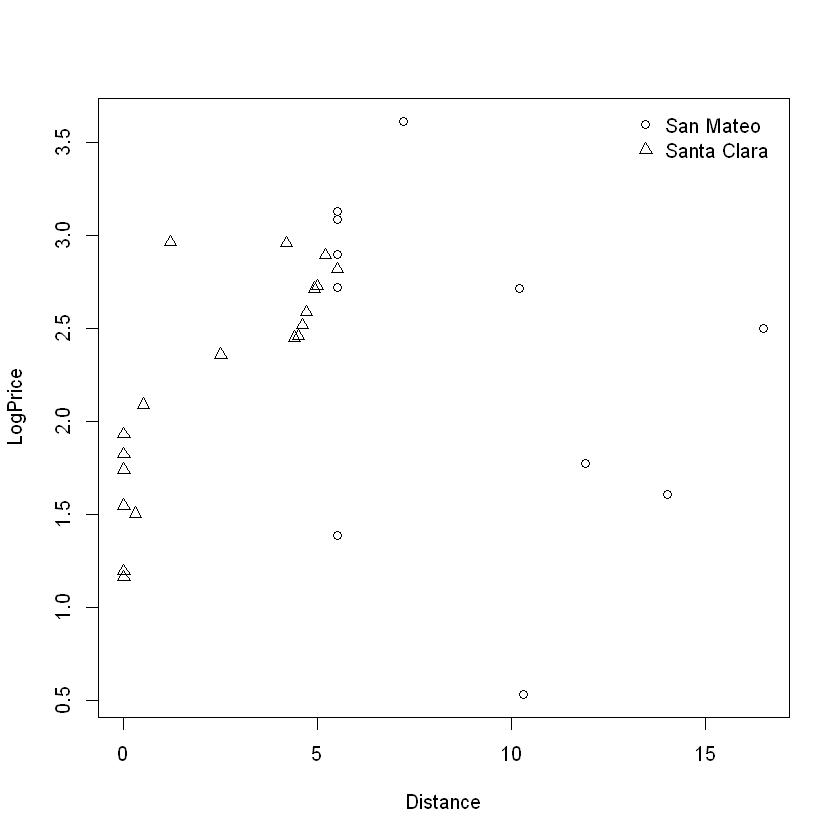

In [17]:
plot(LogPrice~Distance,data=data,pch=(1:2)[County])
legend("topright",legend=c("San Mateo","Santa Clara"),pch=1:2,bty="n")


Though above graph & correlation matrix shows that distance is not having much impact on price, it appears to play role. Due to pairwise correlation between Elevation & Flood (Price Vs Elevation, Price Vs Flood), impact of distance variable on price is reduced. It would be better to consider distance variable. We can remove this variable from the model, if it is providing the improvement in the model.

## Regression Models

### Full Model

In [19]:
fullmodel=lm(LogPrice ~ Sewer + County + Size + Elevation + Date + Flood + Distance, data = data)
summary(fullmodel)



Call:
lm(formula = LogPrice ~ Sewer + County + Size + Elevation + Date + 
    Flood + Distance, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.41605 -0.22833  0.01037  0.22662  0.63418 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        3.099e+00  2.815e-01  11.006 1.22e-10 ***
Sewer             -8.338e-05  3.066e-05  -2.720 0.012214 *  
CountySanta Clara -1.596e-01  2.685e-01  -0.594 0.558013    
Size              -2.578e-04  2.574e-04  -1.002 0.327001    
Elevation          5.053e-02  1.754e-02   2.880 0.008448 ** 
Date               1.479e-02  3.577e-03   4.135 0.000403 ***
FloodYes          -9.819e-01  2.198e-01  -4.468 0.000175 ***
Distance           4.889e-02  2.496e-02   1.958 0.062407 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3258 on 23 degrees of freedom
Multiple R-squared:  0.8416,	Adjusted R-squared:  0.7934 
F-statistic: 17.46 on 7 and 23 DF,  p-v

P-value is less than 0.05 however adjusted R square (0.79) is less than Multiple R Square (0.84). As size doesn’t have much importance with respect to p -value & explanation from above scatter diagrams, build model without size

### Model without Size

In [23]:
model1=lm(LogPrice ~ Sewer + County + Elevation + Date + Flood + Distance , data = data)
summary(model1)



Call:
lm(formula = LogPrice ~ Sewer + County + Elevation + Date + Flood + 
    Distance, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.39640 -0.25968 -0.00964  0.23159  0.69841 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        3.156e+00  2.756e-01  11.453 3.26e-11 ***
Sewer             -8.320e-05  3.066e-05  -2.714 0.012111 *  
CountySanta Clara -1.031e-01  2.626e-01  -0.393 0.697922    
Elevation          5.093e-02  1.754e-02   2.904 0.007792 ** 
Date               1.647e-02  3.158e-03   5.216 2.41e-05 ***
FloodYes          -9.236e-01  2.119e-01  -4.358 0.000213 ***
Distance           4.083e-02  2.363e-02   1.728 0.096883 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3258 on 24 degrees of freedom
Multiple R-squared:  0.8347,	Adjusted R-squared:  0.7934 
F-statistic:  20.2 on 6 and 24 DF,  p-value: 2.723e-08


### Model without Size & County

In [24]:
model9=lm(LogPrice~Sewer+Elevation+Date+Flood+Distance, data=data)
summary(model9)



Call:
lm(formula = LogPrice ~ Sewer + Elevation + Date + Flood + Distance, 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.38511 -0.25256 -0.01794  0.20994  0.72640 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.089e+00  2.115e-01  14.603 9.60e-14 ***
Sewer       -7.859e-05  2.783e-05  -2.824  0.00919 ** 
Elevation    5.048e-02  1.720e-02   2.934  0.00707 ** 
Date         1.724e-02  2.435e-03   7.080 2.02e-07 ***
FloodYes    -8.835e-01  1.826e-01  -4.838 5.66e-05 ***
Distance     4.784e-02  1.521e-02   3.147  0.00424 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3203 on 25 degrees of freedom
Multiple R-squared:  0.8336,	Adjusted R-squared:  0.8003 
F-statistic: 25.05 on 5 and 25 DF,  p-value: 5.474e-09


After removing county, we have improvement in Adjusted R square and P value.

However as explained in Plot diagram section, relationship between county and elevation having some impact on price. Hence lets build the model by adding County* Elevation and removing Elevation


### Final Model

In [25]:
model10=lm(LogPrice~Sewer+Date+Flood+Distance+County*Elevation, data=data)
summary(model10)



Call:
lm(formula = LogPrice ~ Sewer + Date + Flood + Distance + County * 
    Elevation, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.38108 -0.23522 -0.01244  0.16942  0.68343 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  1.989e+00  4.322e-01   4.601 0.000126 ***
Sewer                       -6.484e-05  2.664e-05  -2.434 0.023108 *  
Date                         1.577e-02  2.689e-03   5.867 5.58e-06 ***
FloodYes                    -5.183e-01  2.197e-01  -2.359 0.027169 *  
Distance                     9.159e-02  2.553e-02   3.588 0.001557 ** 
CountySanta Clara            9.227e-01  3.894e-01   2.370 0.026558 *  
Elevation                    2.691e-01  6.952e-02   3.871 0.000774 ***
CountySanta Clara:Elevation -2.286e-01  7.116e-02  -3.213 0.003857 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2765 on 23 degrees of freedom
Multiple R-squ

After adding elevation and County relationship, we have significant improvement in the model.

### Residual Diagrams

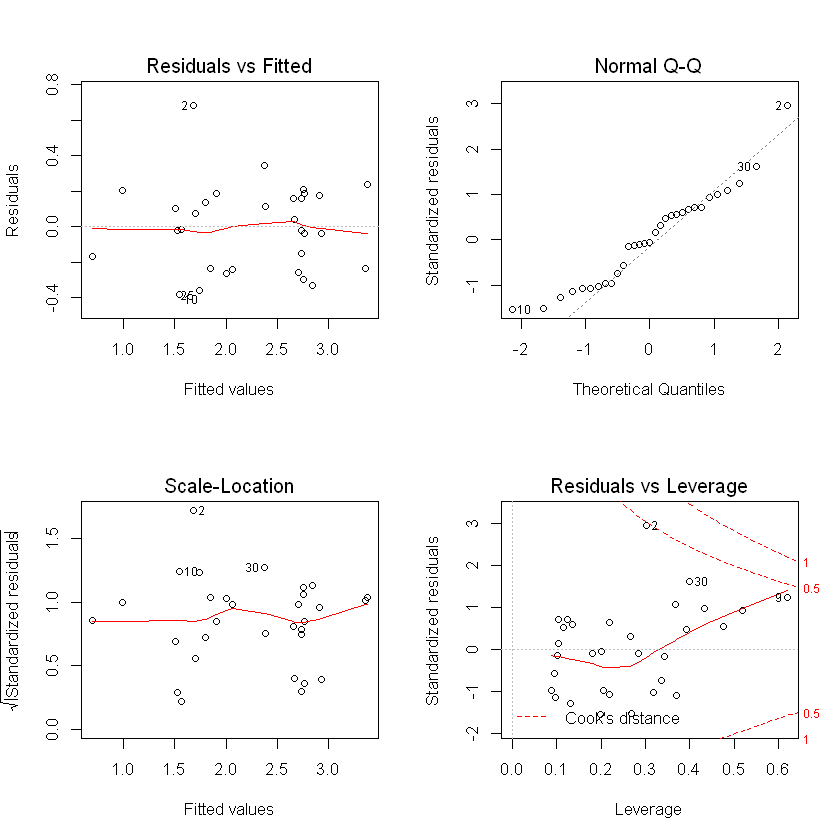

In [26]:
par(mfrow = c(2, 2))
plot(model10)

## Predict the price of Leslie Salt property

County – In record 11, 12, distance mentioned as 0. Hence those property are nearby property Leslie. Both belongs to county 1. Hence, we mentioned Leslie property also ‘1’

Size – 0.646 (given in the problem)

Elevation –0  (property at sea leve)

Sewer -0 (no data provided. Hence 0)

Date – assume that property may sold in next 3 months

Flood- 0 (property is diked)

Distance – 0 (distance with respect to Leslie property)


In [28]:
leslie_salt <- data.frame(0,"Santa Clara",246.8,0,0,0,"No",0,log(0))
colnames(leslie_salt) <- c("Price", "County", "Size", "Elevation", "Sewer", "Date", "Flood", "Distance","LogPrice")
data<-rbind(data,leslie_salt)
leslie_salt_price <- predict(model10, newdata = data[32,])
price=exp(leslie_salt_price)
price


32 
18.38024

The price of Leslie Salt property is $18340/acre.

### If property sold in another 3 months

In [29]:
leslie_salt <- data.frame(0,"Santa Clara",246.8,0,0,3,"No",0,log(0))
colnames(leslie_salt) <- c("Price", "County", "Size", "Elevation", "Sewer", "Date", "Flood", "Distance",
"LogPrice")
data<-rbind(data,leslie_salt)
leslie_salt_price <- predict(model10, newdata = data[33,])
price=exp(leslie_salt_price)
price


33 
19.27097

The price of Leslie Salt property is $19271/acre.

### If property sold in another 6 months

In [30]:
leslie_salt <- data.frame(0,"Santa Clara",246.8,0,0,6,"No",0,log(0))
colnames(leslie_salt) <- c("Price", "County", "Size", "Elevation", "Sewer", "Date", "Flood", "Distance",
"LogPrice")
data<-rbind(data,leslie_salt)
leslie_salt_price <- predict(model10, newdata = data[34,])
price=exp(leslie_salt_price)
price


34 
20.20487

The price of Leslie Salt property is $20204/acre.